# HOMEWORK 2: UP-AND-IN / OUT CALLS AND PUTS PAYOFF FUNCTIONS
### Vitalii Rudko
### April, 2021

## Description
A barrier option is defined as an option which payoff depends on whether the underlying asset hit the certain price level during the specified time range. In general, there are two main classes of barriers options, knock-out options and knock-in options. The knock-out options cease to exist after reaching a particular price level, knock-in options work the other way around, they commence to exist after hitting the barrier.

Let's consider European up-and-in call and put options. Up-and-in is a type of the knock-in option, when the barrier is set above the initial price. In order to describe its payoff function, we should define the suprimum of time series of the spot prices. Let $S=\left\{S_{t}: 0<t<T\right\}$ be a spot price process and $m_{S}=\sup \left\{S_{t} : 0<t<T\right\}$ be a suprimum of the set $S$, where $T$ is an expiration date, then the payoff function at the maturity for call is

\begin{equation}
\pi\left(S_{T}, m_{S}\right)=\max(S_{T}-K, 0)\mathbf{1}^{+}\left(m_{S} \geq H\right),
\end{equation}

and for put,

\begin{equation}
\pi\left(S_{T}, m_{S}\right)=\max(K-S_{t}, 0)\mathbf{1}^{+}\left(m_{S} \geq H\right)
\end{equation}

where $K$ is a strike price, $H$ is a price limit and $\mathbf{1}^{+}\left(m_{S} \geq H\right)$ is an indicator functions, which takes $1$ if $m_{S} \geq H$, and $0$ otherwise. 

Up-and-out put and call options' payoff functions are similar, with only one difference -- options cease to exist after hitting the barrier. Therefore the payoff function of call is

\begin{equation}
\pi\left(S_{T}, m_{S}\right)=\max(S_{T}-K, 0)\mathbf{1}^{-}\left(m_{S} \geq H\right),
\end{equation}

and for put,

\begin{equation}
\pi\left(S_{T}, m_{S}\right)=\max(K-S_{t}, 0)\mathbf{1}^{-}\left(m_{S} \geq H\right)
\end{equation}

where $\mathbf{1}^{-}\left(m_{S} \geq H\right)$ is an indicator functions, which takes $0$ if $m_{S} \geq H$, and $1$ otherwise. 

## Assumptions
The list of assumptions for our options is listed bellow:
1. Underlying asset is S\&P500;
2. The strike price, $K = 3800$;
3. The barrier, $H = 3850$;
4. The multiplier is set to \$100;
5. To show how functions work, the strictly increasing $\left[2800, 4200\right]$ range is applied. For practical applications the functions must be defind as in the analytical formulas provided.

In [16]:
#Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [3]:
#Importing data
sp500_df = yf.download('^GSPC', 
                      start = '2020-04-25', 
                      end = '2021-04-25', 
                      interval = "1d",
                      progress = False)
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-24,2812.639893,2842.709961,2791.760010,2836.739990,2836.739990,5374480000
2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000


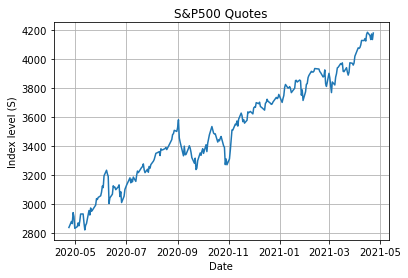

In [15]:
#Plotting S&P500 closing quotes
plt.plot(sp500_df.index, sp500_df["Close"])

#setting plot parameters;
plt.title("S&P500 Quotes")
plt.xlabel("Date")
plt.ylabel("Index level (S)")
plt.grid()

In [122]:
#Maturity
T = 1

#Spot ptices
S = range(2800,4200)

#Strike price
K = 3800

#Barrier
H = 3850

#Multiplier
m = 100

In [123]:
#Defining functions

def eu_up_and_in_call(S, K, H, vec = 0, multiperiod = False):
    """
    ## INPUT
    ## ______
    ## Float: S (optional) - current price; 
    ## Float: K - strike price;
    ## Float: H - barrier;
    ## Float: vec - a numpy array or list of spot prices from oldest to newest;
    ## Boolean: multiperiod - if False payoff is calculated only on the basis current price,
    ##                        if True then on the basis of the vector of spot prices; 
    ## OUTPUT
    ## ______
    ## Float: Payoff of the European up-and-in call option at the last spot price; 
    """
    
    if multiperiod == False:
        if S >= H:
            return max(S - K, 0)
        else: 
            return 0
    else:
        sup = np.max(np.array(vec))
        S = np.array(vec)[-1]
        
        if sup >= H:
            return max(S - K, 0)
        else:
            return 0
        
def eu_up_and_in_put(S, K, H, vec = 0, multiperiod = False):
    """
    ## INPUT
    ## ______
    ## Float: S (optional) - current price; 
    ## Float: K - strike price;
    ## Float: H - barrier;
    ## Float: vec - a numpy array or list of spot prices from oldest to newest;
    ## Boolean: multiperiod - if False payoff is calculated only on the basis current price,
    ##                        if True then on the basis of the vector of spot prices; 
    ## OUTPUT
    ## ______
    ## Float: Payoff of the European up-and-in put option at the last spot price; 
    """
    
    if multiperiod == False:
        if S >= H:
            return max(K - S, 0)
        else: 
            return 0
    else:
        sup = np.max(np.array(vec))
        S = np.array(vec)[-1]
        
        if sup >= H:
            return max(K - S, 0)
        else:
            return 0
        
def eu_up_and_out_call(S, K, H, vec = 0, multiperiod = False):
    """
    ## INPUT
    ## ______
    ## Float: S (optional) - current price; 
    ## Float: K - strike price;
    ## Float: H - barrier;
    ## Float: vec - a numpy array or list of spot prices from oldest to newest;
    ## Boolean: multiperiod - if False payoff is calculated only on the basis current price,
    ##                        if True then on the basis of the vector of spot prices; 
    ## OUTPUT
    ## ______
    ## Float: Payoff of the European up-and-out call option at the last spot price; 
    """
    
    if multiperiod == False:
        if S < H:
            return max(S - K, 0)
        else: 
            return 0
    else:
        sup = np.max(np.array(vec))
        S = np.array(vec)[-1]
        
        if sup < H:
            return max(S - K, 0)
        else:
            return 0
        
def eu_up_and_out_put(S, K, H, vec = 0, multiperiod = False):
    """
    ## INPUT
    ## ______
    ## Float: S (optional) - current price; 
    ## Float: K - strike price;
    ## Float: H - barrier;
    ## Float: vec - a numpy array or list of spot prices from oldest to newest;
    ## Boolean: multiperiod - if False payoff is calculated only on the basis current price,
    ##                        if True then on the basis of the vector of spor prices; 
    ## OUTPUT
    ## ______
    ## Float: Payoff of the European up-and-out put option at the last spot price; 
    """
    
    if multiperiod == False:
        if S < H:
            return max(K - S, 0)
        else: 
            return 0
    else:
        sup = np.max(np.array(vec))
        S = np.array(vec)[-1]
        
        if sup < H:
            return max(K - S, 0)
        else:
            return 0

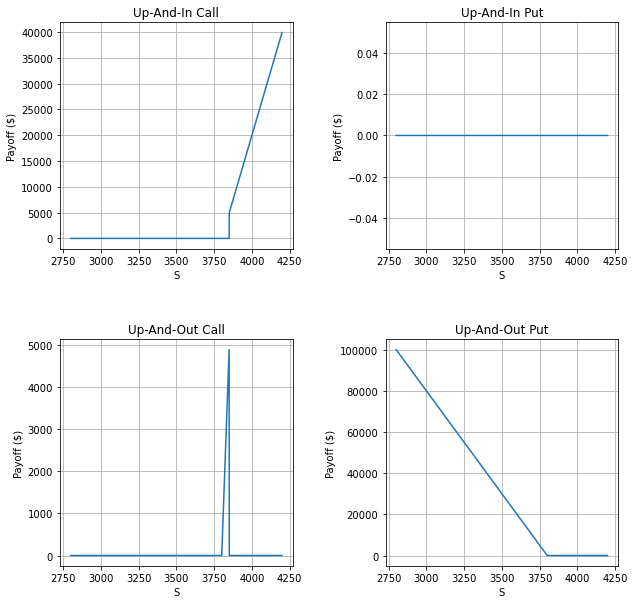

In [124]:
#Figure parameters 
f = plt.figure(figsize=(10,10))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

#Plotting payoff function of European up-and-in call 
payoff_1 = np.array([eu_up_and_in_call(i, K, H) for i in S]) * 100

ax1.plot(S, payoff_1)

#setting plot parameters;
ax1.set_title("Up-And-In Call")
ax1.set_xlabel("S")
ax1.set_ylabel("Payoff (\$)")
ax1.grid()

#Plotting payoff function of European up-and-in put 
payoff_2 = np.array([eu_up_and_in_put(i, K, H) for i in S]) * 100

ax2.plot(S, payoff_2)

#setting plot parameters;
ax2.set_title("Up-And-In Put")
ax2.set_xlabel("S")
ax2.set_ylabel("Payoff (\$)")
ax2.grid()

#Plotting payoff function of European up-and-out call 
payoff_3 = np.array([eu_up_and_out_call(i, K, H) for i in S]) * 100

ax3.plot(S, payoff_3)

#setting plot parameters;
ax3.set_title("Up-And-Out Call")
ax3.set_xlabel("S")
ax3.set_ylabel("Payoff (\$)")
ax3.grid()

#Plotting payoff function of European up-and-out put 
payoff_4 = np.array([eu_up_and_out_put(i, K, H) for i in S]) * 100

ax4.plot(S, payoff_4)

#setting plot parameters;
ax4.set_title("Up-And-Out Put")
ax4.set_xlabel("S")
ax4.set_ylabel("Payoff (\$)")
ax4.grid()

plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.show()